In [248]:
# Purpose

# Find which item is generates high sales.
# Which item can potentially generate high revenue.
# What is effect of weekdays on sales.
# Which shift has made high revenue.

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df = pd.read_csv("/content/Balaji Fast Food Sales.csv")
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [251]:
# Data Cleaning

In [252]:
df.isna().sum()

,0
order_id,0
date,0
item_name,0
item_type,0
item_price,0
quantity,0
transaction_amount,0
transaction_type,107
received_by,0
time_of_sale,0


In [253]:
df['transaction_type'].fillna('N.S', inplace=True)

/tmp/ipython-input-253-682622351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transaction_type'].fillna('N.S', inplace=True)


In [254]:
df.duplicated().sum()

np.int64(0)

In [255]:
df.dtypes

,0
order_id,int64
date,object
item_name,object
item_type,object
item_price,int64
quantity,int64
transaction_amount,int64
transaction_type,object
received_by,object
time_of_sale,object


In [256]:
df.rename(columns={'time_of_sale':'shift'}, inplace=True)

Checking Categorical Columns for number of categories

In [257]:
df['item_name'].unique(), df['item_type'].unique(), df['shift'].unique()

(array(['Aalopuri', 'Vadapav', 'Sugarcane juice', 'Panipuri', 'Frankie',
        'Sandwich', 'Cold coffee'], dtype=object),
 array(['Fastfood', 'Beverages'], dtype=object),
 array(['Night', 'Afternoon', 'Evening', 'Morning', 'Midnight'],
       dtype=object))

There is a little bit issue in date column as it is type object,

so converting to type datetime but before checking if it is appropriate for conversion.

In [258]:
df['date'].unique()

array(['07-03-2022', '8/23/2022', '11/20/2022', '02-03-2023',
       '10-02-2022', '11/14/2022', '05-03-2022', '12/22/2022',
       '06-10-2022', '9/16/2022', '12-01-2022', '07-12-2022',
       '11/25/2022', '4/14/2022', '10/16/2022', '11-05-2022', '8/22/2022',
       '9/15/2022', '12/21/2022', '10-04-2022', '5/26/2022', '02-11-2023',
       '8/31/2022', '8/18/2022', '10-12-2022', '01-06-2023', '02-10-2023',
       '1/28/2023', '9/14/2022', '05-06-2022', '02-05-2023', '02-04-2023',
       '5/22/2022', '07-02-2022', '01-05-2023', '03-08-2023', '5/14/2022',
       '11/13/2022', '05-09-2022', '8/28/2022', '8/15/2022', '05-07-2022',
       '07-10-2022', '2/23/2023', '11-06-2022', '11-02-2022', '5/16/2022',
       '3/16/2023', '7/26/2022', '12/28/2022', '11/23/2022', '08-04-2022',
       '07-01-2022', '06-11-2022', '12/25/2022', '10/17/2022',
       '12-09-2022', '7/25/2022', '04-05-2022', '5/15/2022', '12/17/2022',
       '01-10-2023', '12-05-2022', '03-09-2023', '7/29/2022',
       '02-02

In [259]:
df['date'] = df['date'].apply(lambda x: x.replace('/', '-', 2))

In [260]:
df['date'] = pd.to_datetime(df['date'])

Sorting according to date to get a more clear flow of transactions.

In [261]:
df.sort_values('date', ascending=True, inplace=True)

Mapping the Genders M and F instead of just Mr. and Mrs.

In [262]:
gender_map = {'Mr.':'M', 'Mrs.':'F'}
df['gender'] = df['received_by'].map(gender_map)
df.drop('received_by', axis=1, inplace=True)

Extracting Month to consider month wise average sales further.

Adding Weekend and Weekday flag to check for effect of weekends.

In [263]:
df['month'] = df['date'].dt.strftime('%Y-%m')

In [264]:
df['daytype'] = df['date'].apply(lambda x: 'weekday' if x.weekday() < 5 else 'weekend')

Final Cleaned version with added required columns.

In [265]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,shift,gender,month,daytype
690,691,2022-04-01,Sandwich,Fastfood,60,7,420,Cash,Evening,F,2022-04,weekday
622,623,2022-04-02,Cold coffee,Beverages,40,15,600,Cash,Midnight,M,2022-04,weekend
571,572,2022-04-02,Sandwich,Fastfood,60,15,900,Cash,Afternoon,M,2022-04,weekend
519,520,2022-04-03,Panipuri,Fastfood,20,11,220,Online,Night,F,2022-04,weekend
412,413,2022-04-03,Aalopuri,Fastfood,20,10,200,Online,Midnight,F,2022-04,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
531,532,2023-03-27,Panipuri,Fastfood,20,13,260,Online,Midnight,F,2023-03,weekday
589,590,2023-03-27,Panipuri,Fastfood,20,15,300,Online,Midnight,M,2023-03,weekday
96,97,2023-03-29,Cold coffee,Beverages,40,13,520,Online,Evening,M,2023-03,weekday
547,548,2023-03-29,Cold coffee,Beverages,40,14,560,Cash,Afternoon,M,2023-03,weekday


In [266]:
# Descriptive and Distribution Analysis

In [267]:
df[['transaction_amount', 'item_price']].describe()

,transaction_amount,item_price
count,1000.000000,1000.000000
mean,275.230000,33.315000
std,204.402979,14.921744
min,20.000000,20.000000
25%,120.000000,20.000000
50%,240.000000,25.000000
75%,360.000000,50.000000
max,900.000000,60.000000


The Transaction Amount is so widely distributed.

In [268]:
sns.set_theme(style='darkgrid')

<Axes: xlabel='transaction_amount', ylabel='Density'>

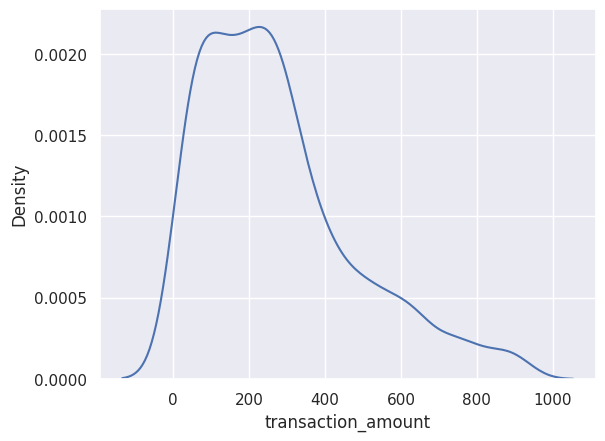

In [269]:
sns.kdeplot(df, x='transaction_amount')

<Axes: xlabel='item_name', ylabel='transaction_amount'>

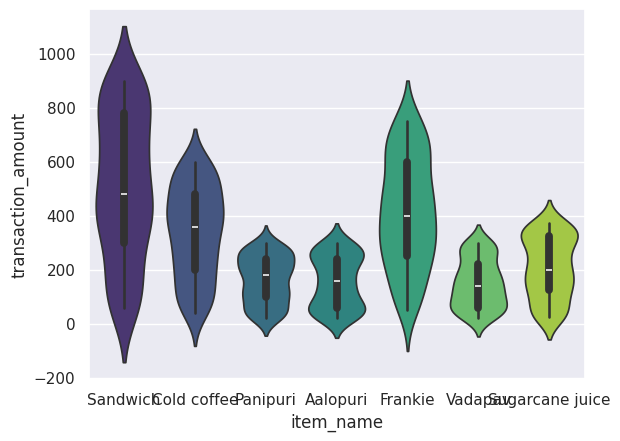

In [270]:
sns.violinplot(df, x='item_name', y='transaction_amount', hue='item_name', palette='viridis')

<Axes: xlabel='shift', ylabel='transaction_amount'>

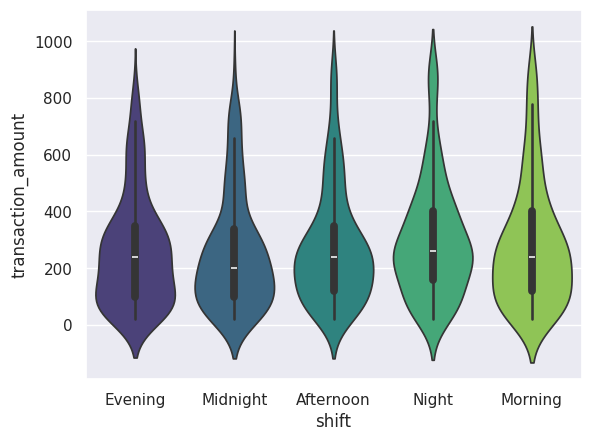

In [271]:
sns.violinplot(df, x='shift', y='transaction_amount', hue='shift', palette='viridis')

These distributions shows, in general the most of data points lies between interquartile range of transaction amount.

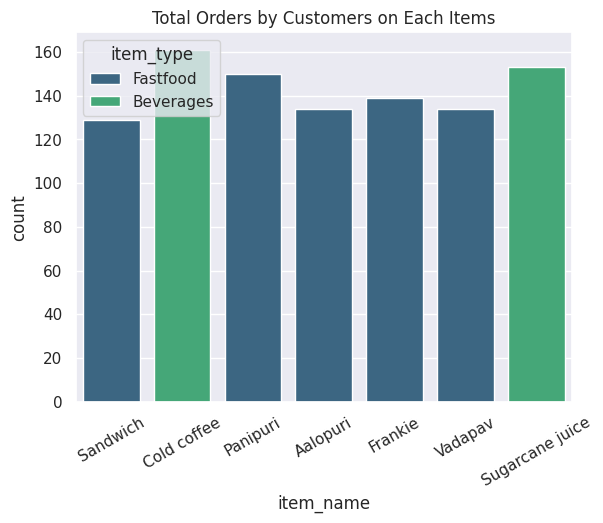

In [272]:
sns.countplot(df, x='item_name', hue='item_type', palette='viridis')
plt.title('Total Orders by Customers on Each Items')
plt.xticks(rotation=30)
plt.show()

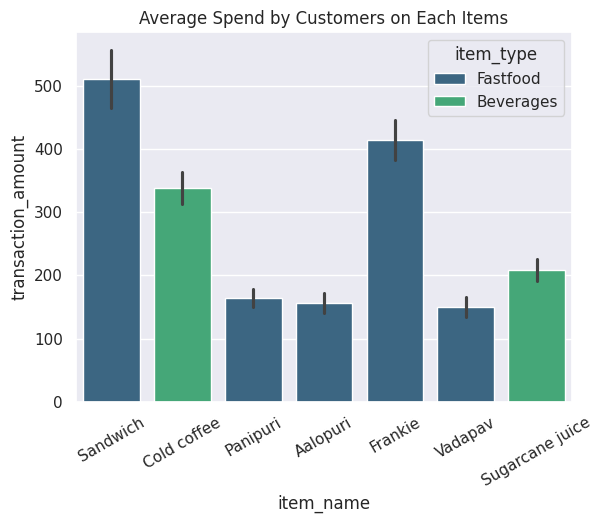

In [273]:
sns.barplot(df, x='item_name', y='transaction_amount', hue='item_type', palette='viridis')
plt.title('Average Spend by Customers on Each Items')
plt.xticks(rotation=30)
plt.show()

So, the list of most selling item goes as

Cold-coffee > Sugar Juice > Pani-Puri > Frankie > Aloopuri > Vadapav > Sandwich

but the list of average spending per item goes as

Sandwich > Frankie > Cold-coffee > Sugar Juice > Pani-Puri > Aloopuri > Vadapav

this reason could be due to pricing of items.

Analysing this thing across different variables and categories to get more clear indications.

Let's take in account of time shifts effect on Transactions.

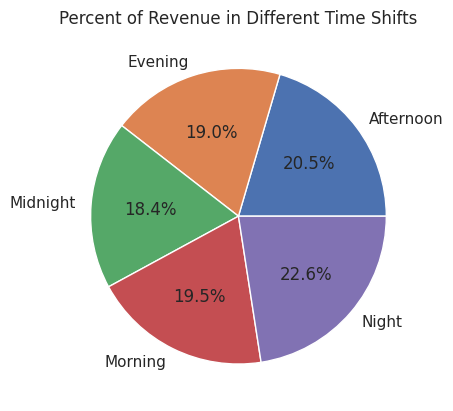

In [274]:
shift_of_sale = df.groupby('shift')['transaction_amount'].sum()
plt.pie(shift_of_sale, autopct="%1.1f%%", labels=shift_of_sale.index)
plt.title('Percent of Revenue in Different Time Shifts')
plt.show()

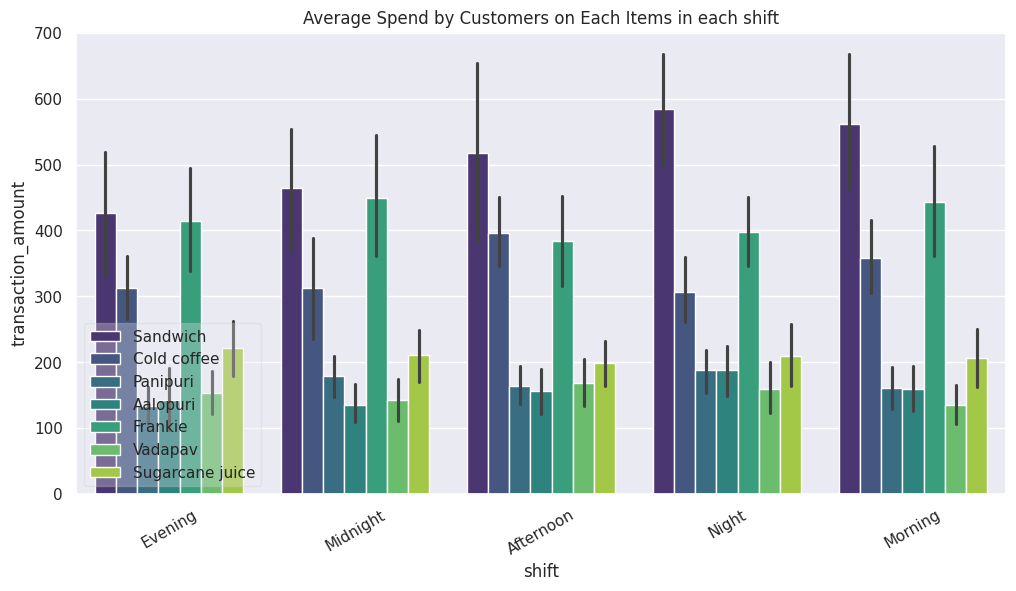

In [275]:
plt.figure(figsize=(12, 6))
sns.barplot(df, x='shift', y='transaction_amount', hue='item_name', palette='viridis')
plt.title('Average Spend by Customers on Each Items in each shift')
plt.xticks(rotation=30)
plt.legend(loc='lower left', framealpha=0.3)
plt.show()

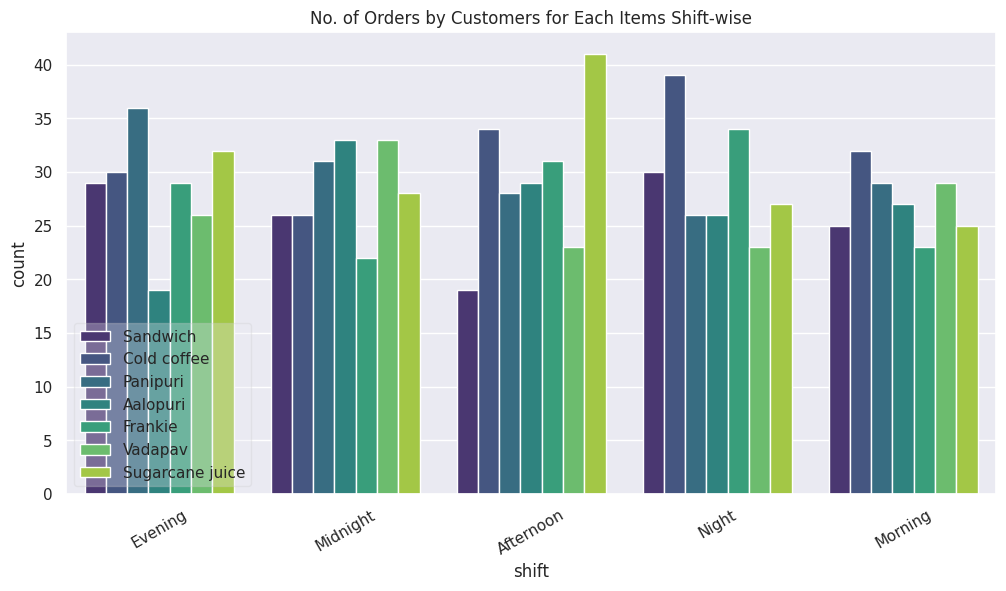

In [276]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='shift', hue='item_name', palette='viridis')
plt.title('No. of Orders by Customers for Each Items Shift-wise')
plt.xticks(rotation=30)
plt.legend(loc='lower left', framealpha=0.3)
plt.show()

Now by also considering the timing factor we can say that more precisely,

which item is had high sales and which is generating higher revenue.

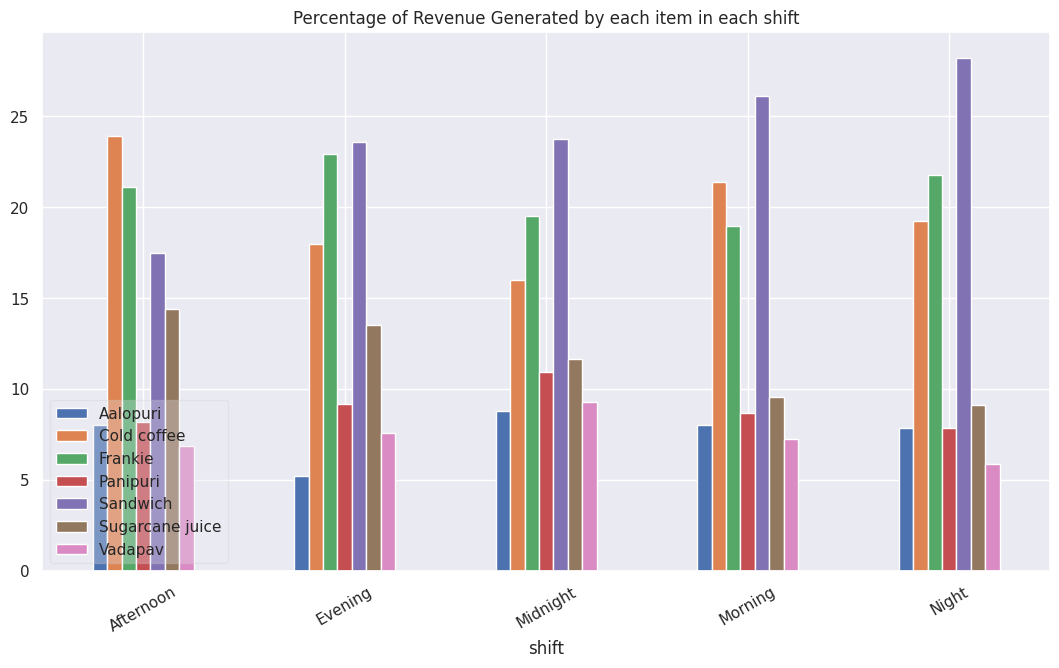

In [277]:
revenue_shift = pd.crosstab(index=df['shift'], columns=df['item_name'], values=df['transaction_amount'], aggfunc='sum', normalize='index')*100

plt.figure(figsize=(13, 7))
revenue_shift.plot(kind='bar', ax=plt.gca())
plt.title('Percentage of Revenue Generated by each item in each shift')
plt.xticks(rotation=30)
plt.legend(loc='lower left', framealpha=0.3)
plt.show()

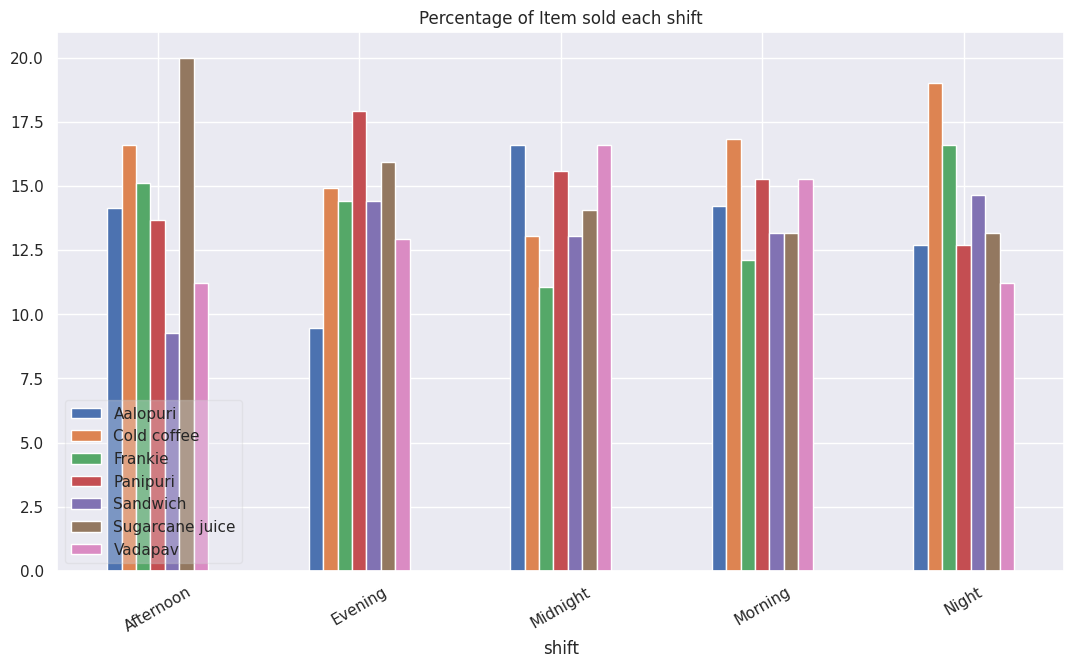

In [278]:
sales_shift = pd.crosstab(index=df['shift'], columns=df['item_name'], normalize='index')*100

plt.figure(figsize=(13, 7))
sales_shift.plot(kind='bar', ax=plt.gca())
plt.title('Percentage of Item sold each shift')
plt.xticks(rotation=30)
plt.legend(loc='lower left', framealpha=0.3)
plt.show()

So, these values says more in Percentage of Sales and Orders of each Item in each shift.

These things conclude, sales in midnight are low which can tackled by carefully observing that the least sold items by restaurant are Sandwich, Cold-Coffee and Frankie.

So if we manage to sell more of these at midnight the revenue will go up as these are expensive items.

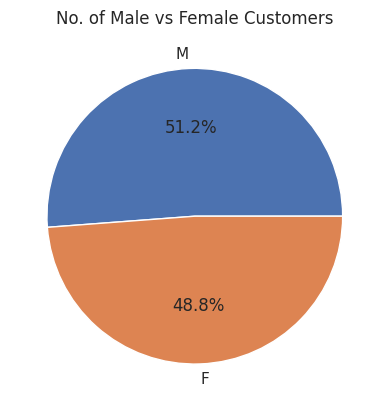

In [279]:
gender = df['gender'].value_counts()
plt.pie(gender, autopct="%1.1f%%", labels=gender.index)
plt.title('No. of Male vs Female Customers')
plt.show()

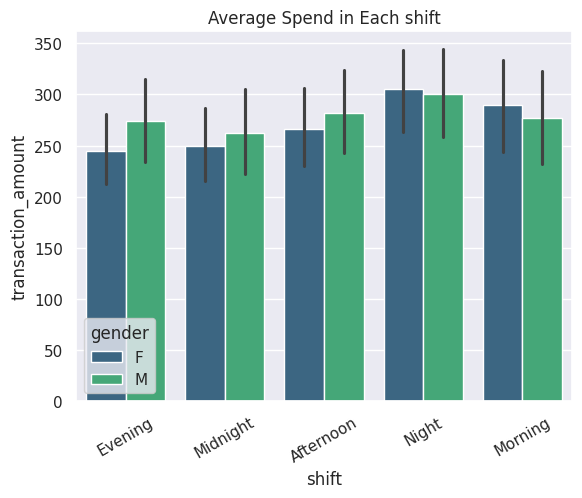

In [281]:
sns.barplot(df, x='shift', y='transaction_amount', hue='gender', palette='viridis')
plt.title('Average Spend in Each shift')
plt.xticks(rotation=30)
plt.show()

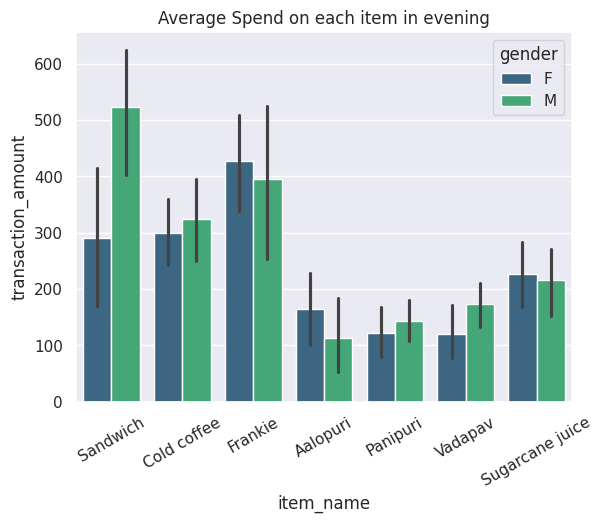

In [290]:
df_evening = df[df['shift']=='Evening']

sns.barplot(df_evening, x='item_name', y='transaction_amount', hue='gender', palette='viridis')
plt.title('Average Spend on each item in evening')
plt.xticks(rotation=30)
plt.show()

So, women are spending less on sandwich and cold coffee in the evening.
This needs to be analysed.

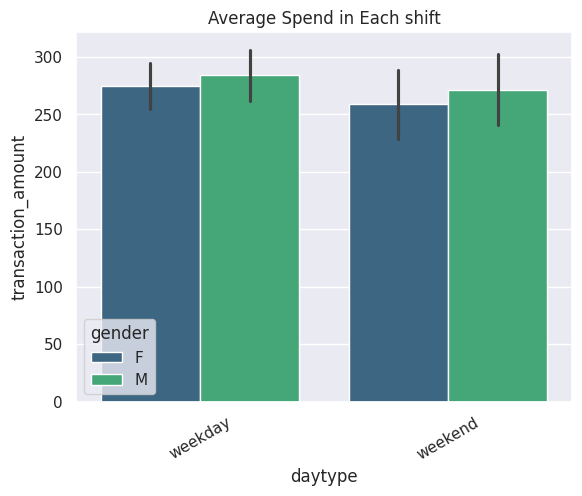

In [291]:
sns.barplot(df, x='daytype', y='transaction_amount', hue='gender', palette='viridis')
plt.title('Average Spend in Each shift')
plt.xticks(rotation=30)
plt.show()

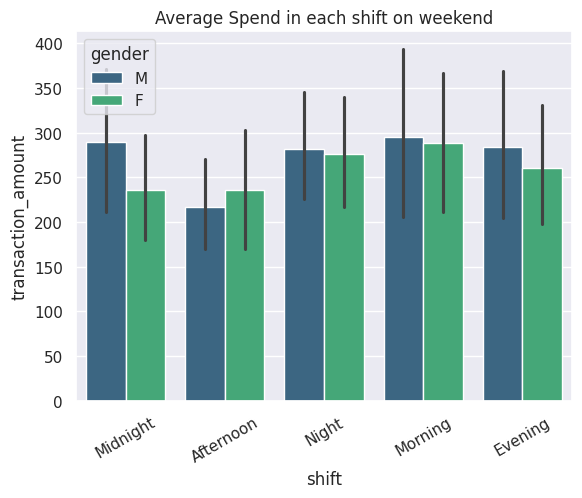

In [301]:
df_weekend = df[df['daytype']=='weekend']

sns.barplot(df_weekend, x='shift', y='transaction_amount', hue='gender', palette='viridis')
plt.title('Average Spend in each shift on weekend')
plt.xticks(rotation=30)
plt.show()

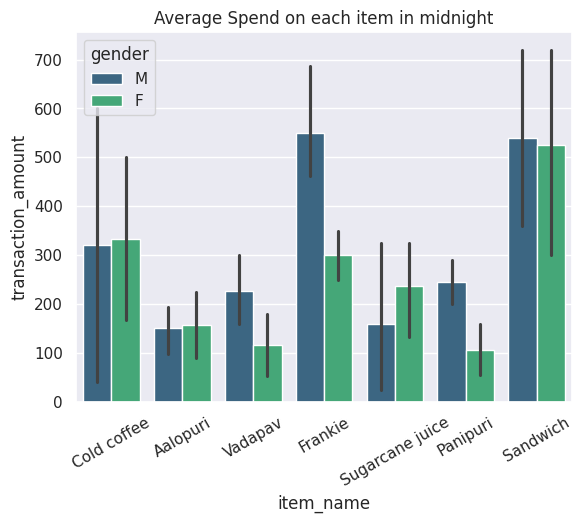

In [306]:
df_weekend_midnight = df[(df['daytype']=='weekend') & (df['shift']=='Midnight')]

sns.barplot(df_weekend_midnight, x='item_name', y='transaction_amount', hue='gender', palette='viridis')
plt.title('Average Spend on each item in midnight')
plt.xticks(rotation=30)
plt.show()

It is also seen that women are spending less in Frankie, Vadapav and Panipuri on Weekend's Midnight.

So lets list out what we want to recommend,

1.Least selling item is sandwich, on the other hand most revenue generating and if restaurant try to focus more on sandwich then the revenue can spike up.

2.If we provide more offers in midnight on Sandwich, Cold-Coffee and Frankie we can increase revenue as seen these are expensive items.

3.In the evening, Women are spending less on Sandwich and Cold-Coffee.

4.Specifically on Weekend's Midnight, Women are spending less in Frankie, Vadapav and Panipuri.